In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

Let's create a signal.

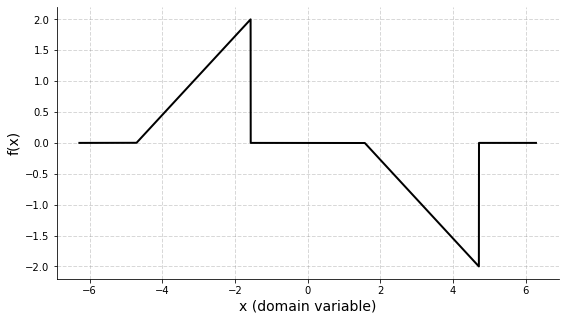

In [3]:
# define domain
dx = 0.0001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
deltax = 2*L/n
nquart = int(np.floor(n/4))

# define the signal shape
f = np.zeros_like(x)
f[nquart:3*nquart] = (4/n)*np.arange(1, 2*nquart+1)

# repeat a flipped version
cycles = 2
L = cycles*L
x = L*np.arange(-1+dx, 1+dx, dx/cycles)
f = np.hstack((f, -f))
dx = 2*L/len(x)

# plot the resulting signal
fig, ax = plt.subplots(figsize=[9,5])
LW = 2
FS = 14
ax.plot(x, f, '-', color='k', linewidth=LW)
ax.set_xlabel('x (domain variable)',fontsize=14)
ax.set_ylabel('f(x)',fontsize=FS) # A.U stands for Arbitrary Units
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

Lets create the above signal and fit it using one term (in addition to the a0) in Fourier series. The variable for this is nterms.

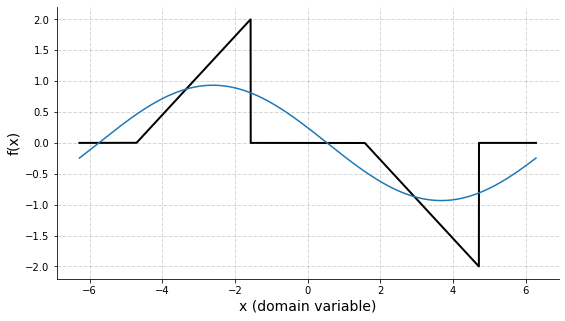

In [4]:
# define domain
dx = 0.0001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
deltax = 2*L/n
nquart = int(np.floor(n/4))

# define hat function
f = np.zeros_like(x)
f[nquart:3*nquart] = (4/n)*np.arange(1, 2*nquart+1)
# f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0, nquart)

# repeat hat function a few times
cycles = 2
L = cycles*L
x = L*np.arange(-1+dx, 1+dx, dx/cycles)
# f = np.tile(f, cycles)
f = np.hstack((f, -f))
dx = 2*L/len(x)

fig, ax = plt.subplots(figsize=[9,5])
LW = 2
ax.plot(x, f, '-', color='k', linewidth=LW)

# compute Fourier Series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx/(L)
fFS = A0/2

nterms = 1
A = np.zeros(nterms)
B = np.zeros(nterms)

ERR = np.zeros(nterms+1)
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
for k in range(nterms):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx/L
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx/L
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)  
    ERR[k+1] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
    ax.plot(x, fFS, '-')

ax.set_xlabel('x (domain variable)',fontsize=14)
ax.set_ylabel('f(x)',fontsize=FS) # A.U stands for Arbitrary Units
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
plt.show()

Lets use more Fourier series terms for making the fit.


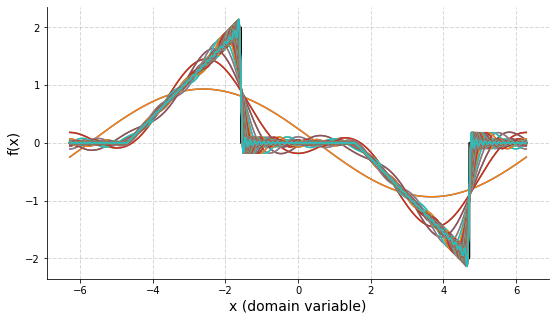

In [5]:
# define domain
dx = 0.0001
L = np.pi
x = L * np.arange(-1+dx, 1+dx, dx)
n = len(x)
deltax = 2*L/n
nquart = int(np.floor(n/4))

# define hat function
f = np.zeros_like(x)
f[nquart:3*nquart] = (4/n)*np.arange(1, 2*nquart+1)
# f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0, nquart)

# repeat hat function a few times
cycles = 2
L = cycles*L
x = L*np.arange(-1+dx, 1+dx, dx/cycles)
# f = np.tile(f, cycles)
f = np.hstack((f, -f))
dx = 2*L/len(x)

fig, ax = plt.subplots(figsize=[9,5])
LW = 2
ax.plot(x, f, '-', color='k', linewidth=LW)

# compute Fourier Series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx/(L)
fFS = A0/2

nterms = 100
A = np.zeros(nterms)
B = np.zeros(nterms)

ERR = np.zeros(nterms+1)
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
for k in range(nterms):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx/L
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx/L
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)  
    ERR[k+1] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
    ax.plot(x, fFS, '-')

ax.set_xlabel('x (domain variable)',fontsize=14)
ax.set_ylabel('f(x)',fontsize=FS) # A.U stands for Arbitrary Units
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
plt.show()

How does the error behave?

/tmp/ipykernel_13563/100142392.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.semilogy(np.arange(nterms),ERR[:-1],color='k',LineWidth=2)
/tmp/ipykernel_13563/100142392.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.semilogy(r,ERR[r],'o',color='b',MarkerSize=10)


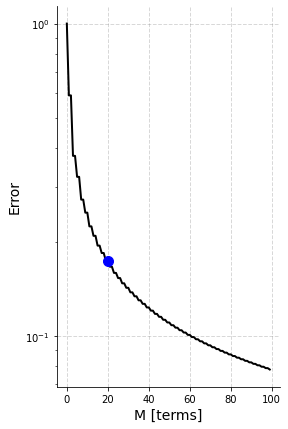

In [73]:
## Plot amplitudes
fig, ax = plt.subplots(figsize=[4,7])
r = 20

plt.semilogy(np.arange(nterms),ERR[:-1],color='k',LineWidth=2)
plt.semilogy(r,ERR[r],'o',color='b',MarkerSize=10)
ax.set_xlabel('M [terms]',fontsize=14)
ax.set_ylabel('Error',fontsize=FS) # A.U stands for Arbitrary Units
ax.grid(color='gray', linestyle='--', linewidth=1,alpha=.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  
plt.show()
